---> this thing you write down in your resume
#### what skills you will use? 
- Python, SQL, Statistics, Data Cleaning, Data Wrangling, ML algorithm (optimization for better model)

#### tools: NumPy, Pandas, Matplotlib, Seaborn, Matplotlib

#### what algorithms you used?

## Step -1 Business Problem Understanding
- Project admission predition
- domain education consultancy
- description

#### At what probability person will get an admission?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step -2 Data Understanding

#### Load data & Understand every variable

In [2]:
df = pd.read_csv('admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### dataset understanding

In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

##### in SOP/ LOR these numbers are weightage

In [7]:
df['SOP'].value_counts()

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64

In [8]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [9]:
df['LOR '].value_counts()

LOR 
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64

In [10]:
df['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [11]:
df['Research'].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [12]:
df['Research'].unique()

array([1, 0], dtype=int64)

#### Exploratory Data Analysis

In [13]:
continuous_features = ['Serial No.', 'GRE Score', 'TOEFL Score', 
                       'CGPA', 'Chance of Admit ','University Rating', 'SOP', 'LOR ', ]
discrete_count = ['Research']

In [14]:
df[continuous_features].describe()

,Serial No.,GRE Score,TOEFL Score,CGPA,Chance of Admit,University Rating,SOP,LOR
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,8.576440,0.72174,3.114000,3.374000,3.48400
std,144.481833,11.295148,6.081868,0.604813,0.14114,1.143512,0.991004,0.92545
min,1.000000,290.000000,92.000000,6.800000,0.34000,1.000000,1.000000,1.00000
25%,125.750000,308.000000,103.000000,8.127500,0.63000,2.000000,2.500000,3.00000
50%,250.500000,317.000000,107.000000,8.560000,0.72000,3.000000,3.500000,3.50000
75%,375.250000,325.000000,112.000000,9.040000,0.82000,4.000000,4.000000,4.00000
max,500.000000,340.000000,120.000000,9.920000,0.97000,5.000000,5.000000,5.00000


<Figure size 500x400 with 0 Axes>

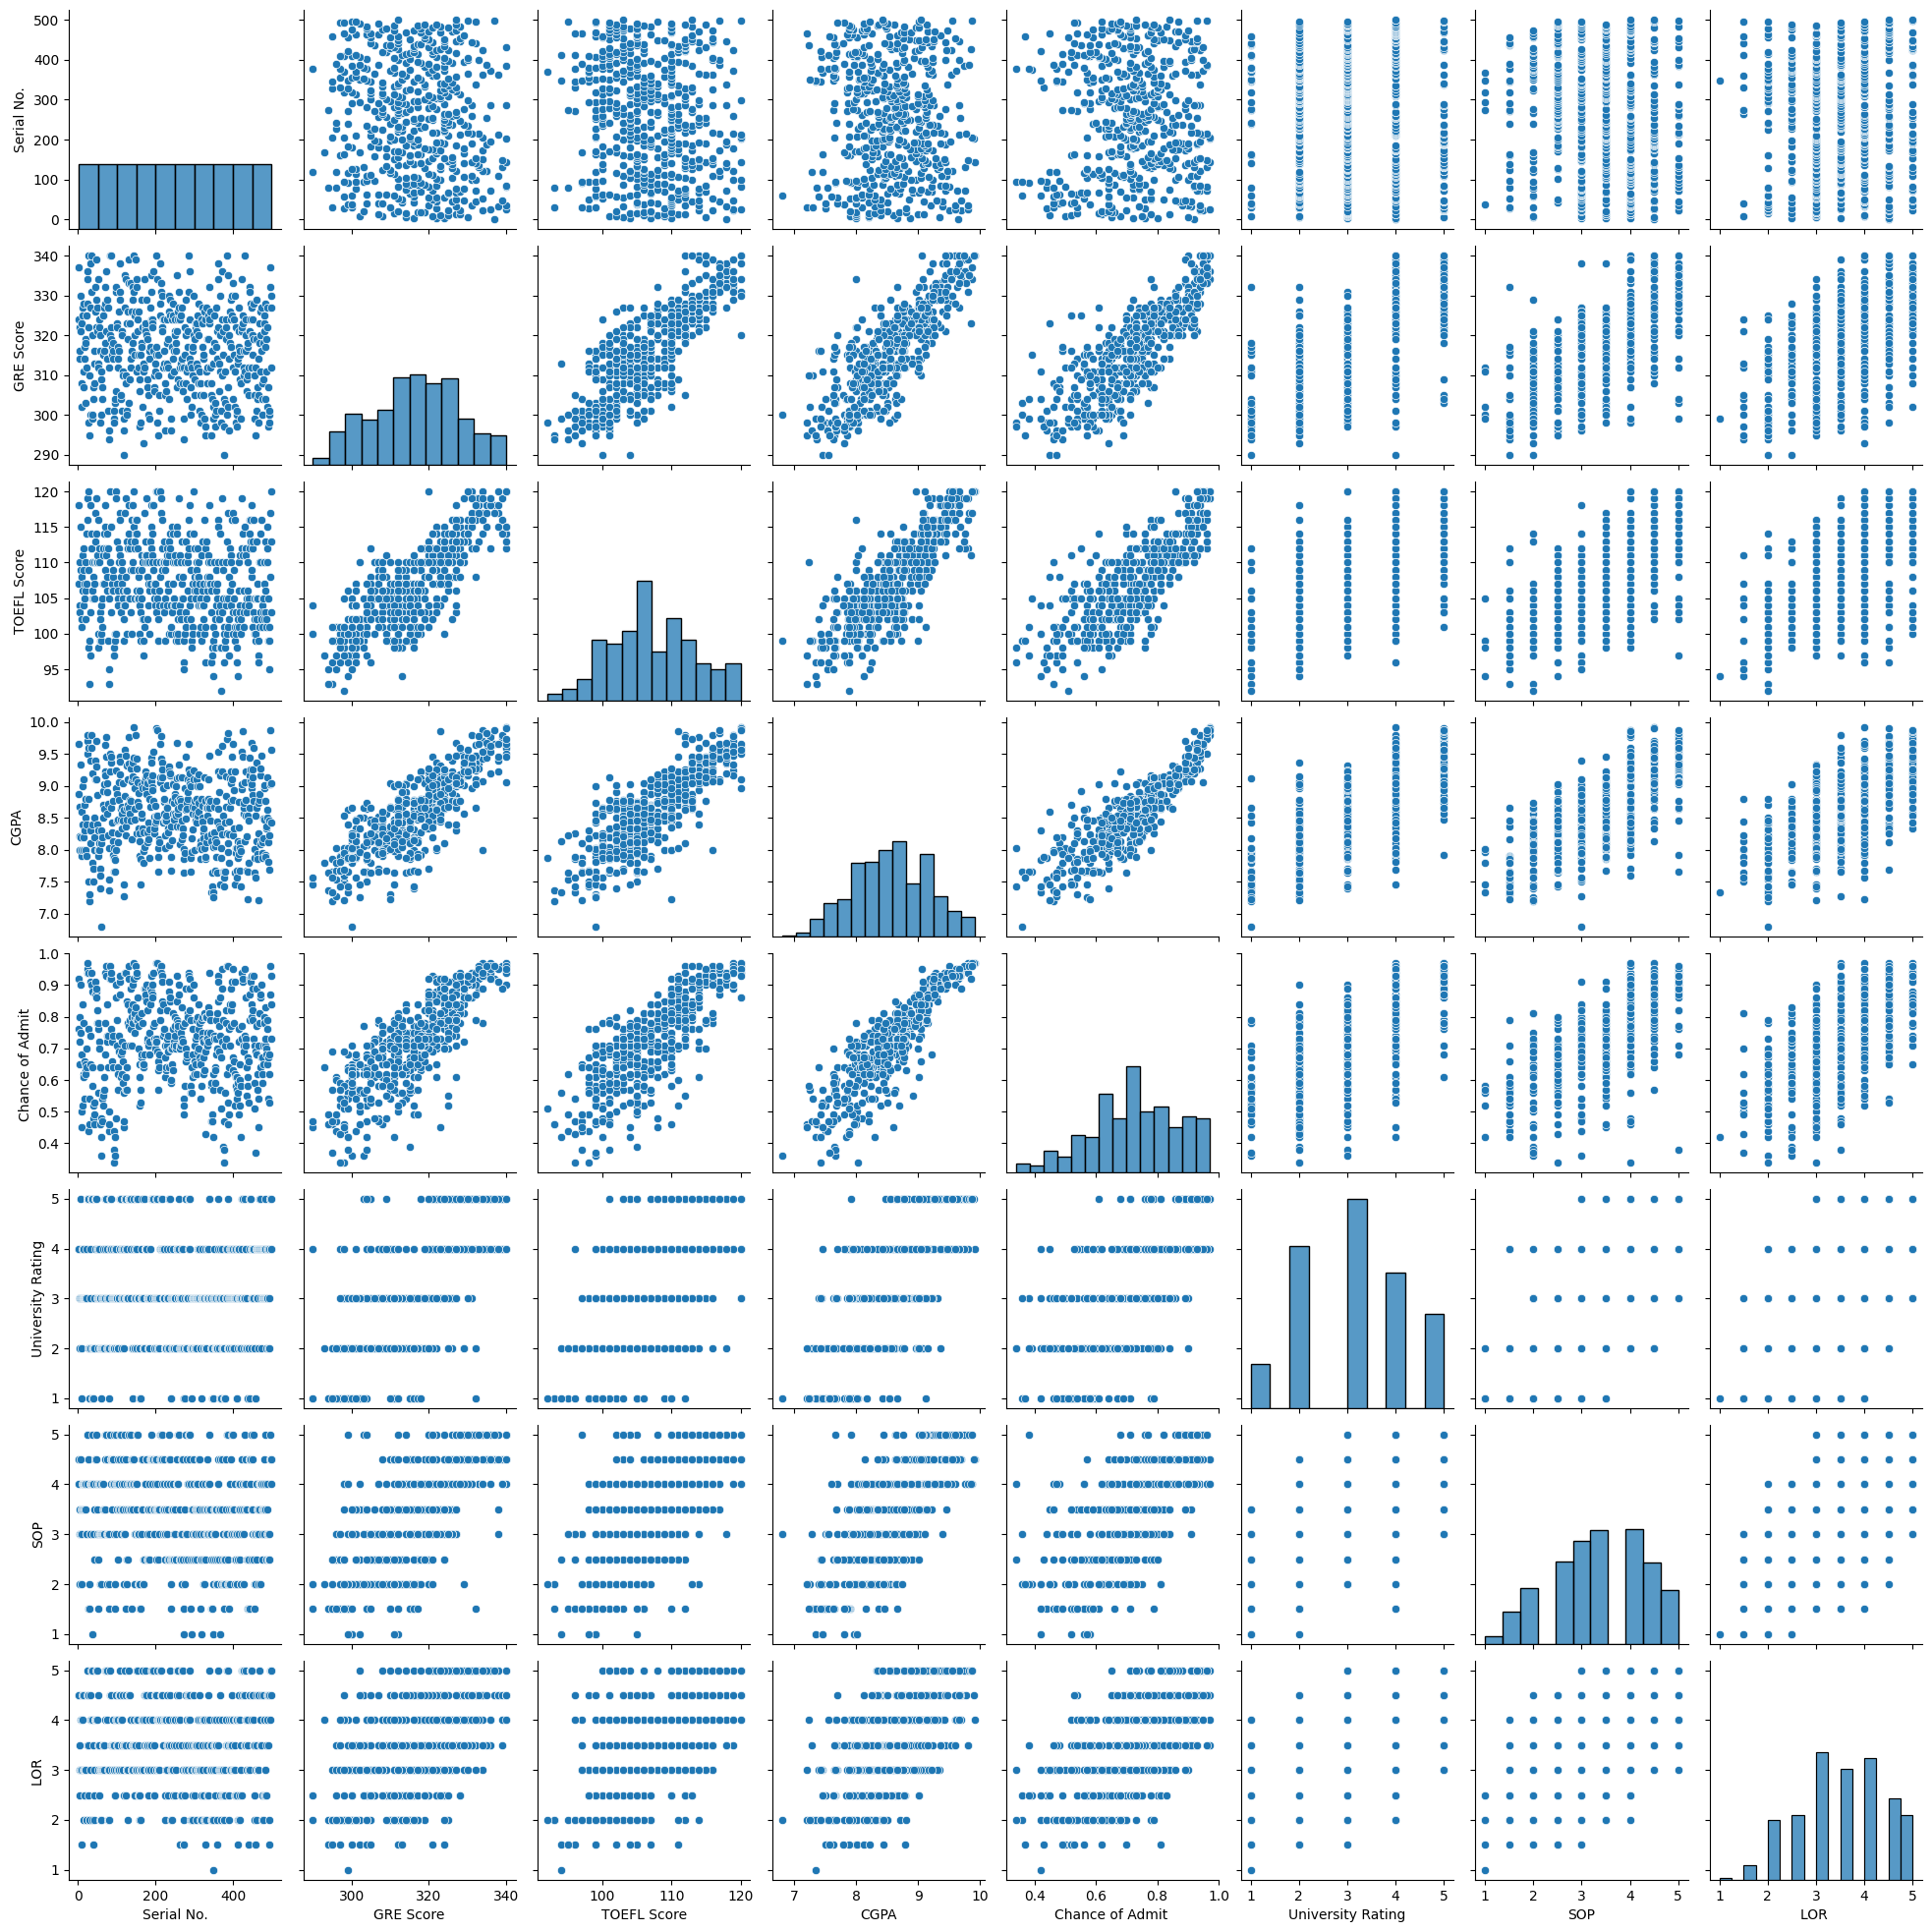

In [15]:
plt.figure(figsize=(5, 4))
sns.pairplot(df[continuous_features])
plt.show()

- if correlation <= 0.2 then drop the column (b/w input and output variable)
- if correlation >= 0.5 then drop the column (b/w two input variable)

In [16]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


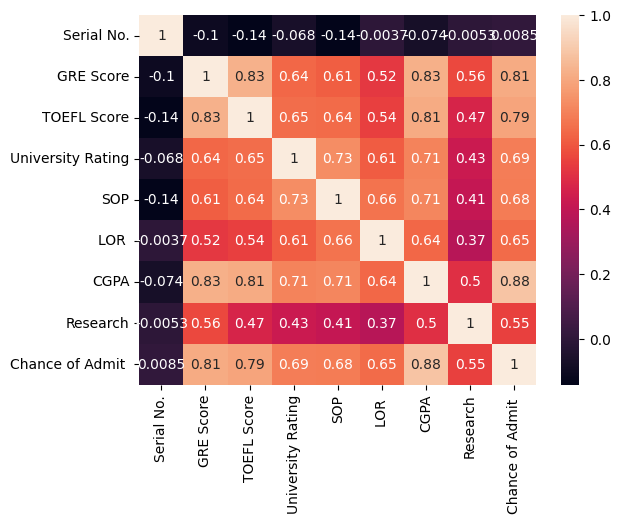

In [17]:
#plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True)
plt.show()

as we can see the correlation between input and output that is less than 2 (means input and output variable are good)

but the correlation between input and input the correlation is very high so we need to drop later by using ols technqiue and VIF technique

- GRE Score vs TOEFL Score (0.82)
- GRE Score vs University Rating (0.63)
- GRE Score vs LOR (0.61)
- GRE Score vs CGPA (0.52)
- GRE Score vs RESEARCH (0.82)
- TOEFL Score vs University Rating (0.64)
.....................................

#### means we can see here multicollinearity problem is occuring

In [18]:
df[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']].skew()

Serial No.           0.000000
GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

all these columns are normally distributed

## Step - 3: Data Preprocessing

In [19]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


#### Data Cleaning

- remove column name

In [20]:
df= df.drop('Serial No.', axis=1)

- replace column name

In [21]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [22]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)
df.rename(columns={'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating', 'Chance of Admit':'Chance_of_Admit'}, inplace=True)

In [23]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [24]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [26]:
# checking outliers

<Axes: xlabel='GRE_Score'>

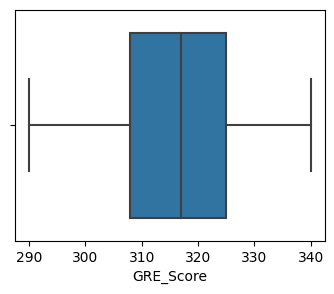

In [27]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['GRE_Score'])

<Axes: xlabel='TOEFL_Score'>

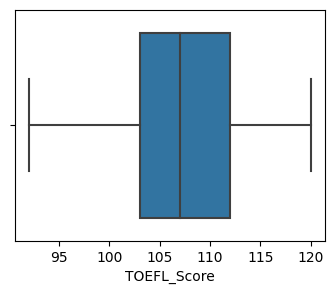

In [28]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['TOEFL_Score'])

<Axes: xlabel='University_Rating'>

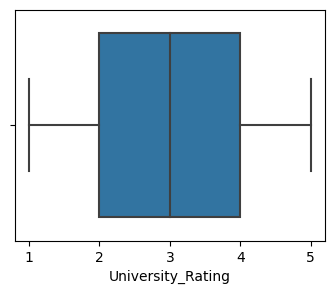

In [29]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['University_Rating'])

<Axes: xlabel='SOP'>

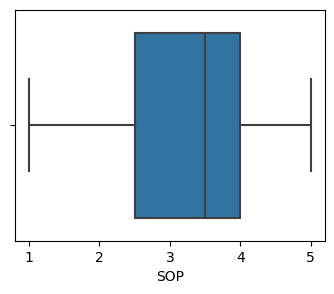

In [30]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['SOP'])

<Axes: xlabel='LOR'>

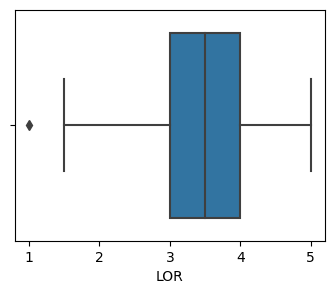

In [31]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['LOR'])

In [32]:
Q1 = df['LOR'].quantile(0.25)
print('Q1:', Q1)
Q3 = df['LOR'].quantile(0.75)
print('Q3:', Q3)
IQR = Q3 - Q1
print('IQR:', IQR)
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
upper_limit = Q3 + (IQR * 1.5)
print('upper_limit:', upper_limit)

df[(df['LOR'] < lower_limit) | (df['LOR'] > upper_limit)]

Q1: 3.0
Q3: 4.0
IQR: 1.0
lower_limit: 1.5
upper_limit: 5.5


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


- change outlier value

In [33]:
df['LOR'] = df['LOR'].clip(lower=1.5, upper=5.5)

<Axes: xlabel='LOR'>

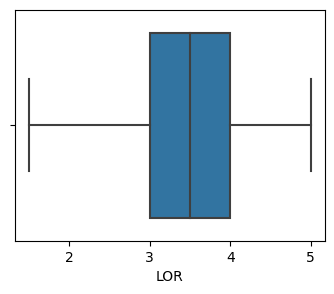

In [34]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['LOR'])

<Axes: xlabel='CGPA'>

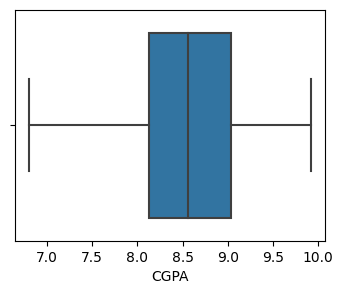

In [35]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['CGPA'])

<Axes: xlabel='Research'>

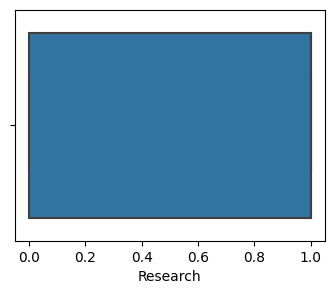

In [36]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Research'])

<Axes: xlabel='Chance_of_Admit'>

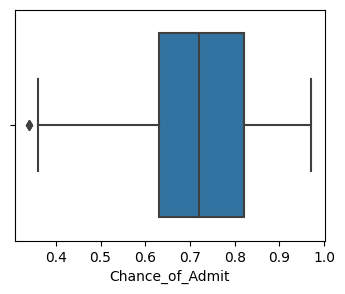

In [37]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Chance_of_Admit'])

In [38]:
Q1 = df['Chance_of_Admit'].quantile(0.25)
print('Q1:', Q1)
Q3 = df['Chance_of_Admit'].quantile(0.75)
print('Q3:', Q3)
IQR = Q3 - Q1
print('IQR:', IQR)
lower_limit = Q1 - (IQR * 1.5)
print('lower_limit:', lower_limit)
upper_limit = Q3 + (IQR * 1.5)
print('upper_limit:', upper_limit)

df[(df['Chance_of_Admit'] < lower_limit) | (df['Chance_of_Admit'] > upper_limit)]

Q1: 0.63
Q3: 0.82
IQR: 0.18999999999999995
lower_limit: 0.3450000000000001
upper_limit: 1.105


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [39]:
df.drop(index=[92, 376])

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


<Axes: xlabel='Chance_of_Admit'>

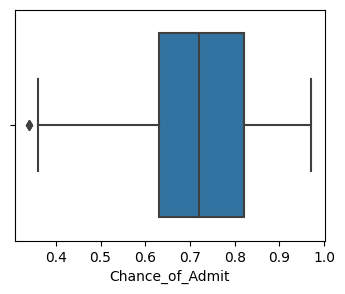

In [41]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Chance_of_Admit'])

In [42]:
X = df.drop(columns='Chance_of_Admit')
y = df['Chance_of_Admit']

In [43]:
df['Chance_of_Admit'].isnull().sum()

0

## Step - 4: Modeling

### findout the best random_state value 

In [44]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Train = []
Test = []
CV = []

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)

    Train.append(model.score(X_train, y_train))
    # print('Train R2:', r2_score(y_train, ypred_train))
    Test.append(model.score(X_test, y_test))
    # print('Test R2:', r2_score(y_test, ypred_test))

    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())


em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV})
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <=0.05)]
print('best random state number:', gm[gm['Test']==gm['Test'].max()].index.to_list())

best random state number: [99]


# <font color = aqua> Lasso Regresion </font> 

#### Apply Hyperparameter tuning for Lasso Regression

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

estimator = Lasso()
param_grid = {'alpha':list(range(1,101))}
# Identifying the best value of the parameter within given values for the given data
model_hp = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
model_hp.fit(X_train, y_train)
model_hp.best_params_

{'alpha': 1}

#### Build Lasso Model using best hyperparameters

In [47]:
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=1)
lasso_best.fit(X_train, y_train)
print('Intercept:', lasso_best.intercept_)
print('Coefficients:', lasso_best.coef_)

# Prediction 
ypred_train = lasso_best.predict(X_train)
ypred_test = lasso_best.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score
print('Train R2:', r2_score(y_train, ypred_train))
print('Test R2:', r2_score(y_test, ypred_test))
from sklearn.model_selection import cross_val_score
print('CV Score:', cross_val_score(lasso_best, X_train, y_train, cv=5).mean())

Intercept: -0.022715527401247937
Coefficients: [0.00234185 0.         0.         0.         0.         0.
 0.        ]
Train R2: 0.2689604383095172
Test R2: 0.25265570490129463
CV Score: 0.26434389376577017


## Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Apply Hyperparameter tuning for Lasso Regression

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

estimator = Lasso()
param_grid = {'alpha':list(range(1,101))}
# Identifying the best value of the parameter within given values for the given data
model_hp = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
model_hp.fit(X_train, y_train)
model_hp.best_params_

{'alpha': 1}

#### Build Lasso Model using best hyperparameters

In [50]:
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=1)
lasso_best.fit(X_train, y_train)
print('Intercept:', lasso_best.intercept_)
print('Coefficients:', lasso_best.coef_)

# Prediction 
ypred_train = lasso_best.predict(X_train)
ypred_test = lasso_best.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score
print('Train R2:', r2_score(y_train, ypred_train))
print('Test R2:', r2_score(y_test, ypred_test))
from sklearn.model_selection import cross_val_score
print('CV Score:', cross_val_score(lasso_best, X_train, y_train, cv=5).mean())

Intercept: 0.7178999999999999
Coefficients: [0. 0. 0. 0. 0. 0. 0.]
Train R2: 0.0
Test R2: -0.01970221142144668
CV Score: -0.0050353792323099885


## as we can see this model is a worst model